<a href="https://colab.research.google.com/github/AaayaB4/ADL/blob/Exercises/exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 6
Implement numerical data augmentation using these approaches:

Apply SMOTE and Borderline-SMOTE techniques for oversampling in a binary classification dataset named 'Imbalanced_data.csv'.
Compare their effectiveness through visual representations.


***

Import packages

In [1]:
#Import packages
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
data = pd.read_csv('Imbalanced_Dataset.csv', header=None)

In [3]:
data.shape

(10000, 3)

In [4]:
data.head()

,0,1,2
0,0.222014,0.540207,0.0
1,1.347439,1.412824,0.0
2,0.537238,0.372730,0.0
3,2.134462,1.404819,0.0
4,2.315827,1.356858,0.0


The dataset consists of 10,000 rows and three columns. The initial two columns represent coordinates, while the final column denotes the class, containing values of either 0 or 1.

***

Splitting the data into features and target class.


In [5]:
X = data.iloc[:, :-1]  # coordinate columns
y = data.iloc[:, -1]   # class

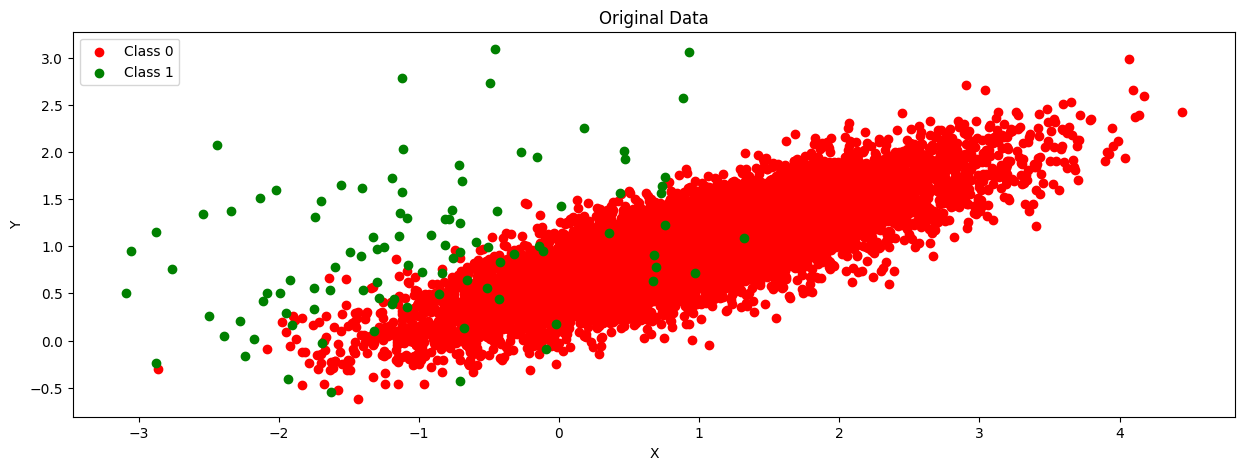

In [16]:
plt.figure(figsize=(15, 5))

# For Class 0 points, use yellow color
plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], color='red', label='Class 0')

# For Class 1 points, use pink color
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], color='green', label='Class 1')

plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()


In [7]:
y.value_counts()

0.0    9900
1.0     100
Name: 2, dtype: int64

The given graph and table distinctly highlight a notable disparity in the dataset's class distribution. With only 100 instances, Class 1 is substantially underrepresented, qualifying as the minority class. In contrast, Class 0 dominates as the majority class with 9,900 instances. This significant difference exemplifies a prevalent issue in machine learning called "class imbalance." This type of imbalance often causes models to develop biases, leading to subpar prediction accuracy for the less represented class.

***

SMOTE (Synthetic Minority Over-sampling Technique) and Borderline-SMOTE are methodologies implemented to counteract class imbalance issues.

**SMOTE** enhances the representation of the minority class by generating synthetic instances instead of merely duplicating existing samples, as seen in basic oversampling approaches. It operates by selecting samples that are in close proximity within the feature space, drawing a line connecting them, and then positioning a new sample somewhere along this line. This approach is beneficial in reducing the overfitting that often arises with straightforward oversampling.

**Borderline-SMOTE**, an advanced version of SMOTE, is tailored to create synthetic samples near the border between minority and majority classes. It pinpoints those minority samples that are predominantly surrounded by majority class neighbors for synthetic sample creation. The generation of new samples follows a similar principle to SMOTE. Its primary focus is on the minority samples that are hardest to classify, aiming to establish more effective decision boundaries between classes. This technique is particularly advantageous in scenarios where the separation between classes is ambiguous, potentially leading to enhanced classifier performance.

In [8]:
random_state = 42

Applying SMOTE

In [9]:
smote = SMOTE(random_state=random_state)
X_smote, y_smote = smote.fit_resample(X, y)

Applying Borderline SMOTE

In [10]:
bl_smote = BorderlineSMOTE(random_state=random_state)
X_bl_smote, y_bl_smote = bl_smote.fit_resample(X, y)

Plotting the results

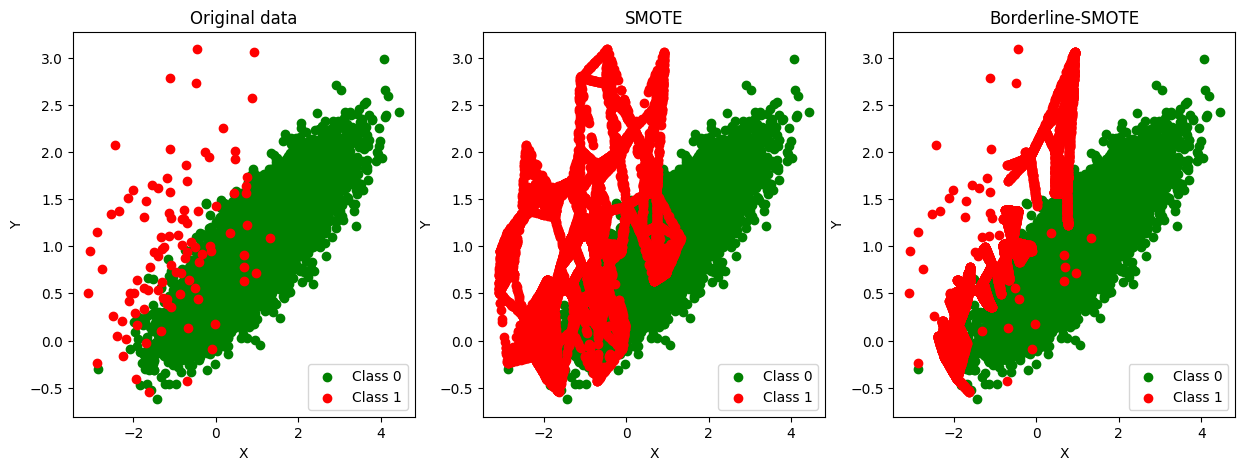

In [17]:
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# SMOTE
plt.subplot(1, 3, 2)
plt.scatter(X_smote[y_smote == 0].iloc[:, 0], X_smote[y_smote == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
plt.scatter(X_smote[y_smote == 1].iloc[:, 0], X_smote[y_smote == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
plt.title('SMOTE')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Borderline-SMOTE
plt.subplot(1, 3, 3)
plt.scatter(X_bl_smote[y_bl_smote == 0].iloc[:, 0], X_bl_smote[y_bl_smote == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
plt.scatter(X_bl_smote[y_bl_smote == 1].iloc[:, 0], X_bl_smote[y_bl_smote == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
plt.title('Borderline-SMOTE')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()


After implementing SMOTE, there is a marked increase in the quantity of instances in class 0, effectively bridging the gaps among the original points. Nonetheless, a challenge emerges as some synthetic instances of class 0 intrude into the territory of class 1, potentially complicating classification decisions. A notable occurrence of 'line' patterns is also visible. These are a direct result of SMOTE's technique of creating new samples along lines connecting class neighbors. This strategy improves the minority class's representation but may also heighten the risk of overfitting to these specific patterns.

In the Borderline-SMOTE plot, there's also an augmentation in class 0 instances, albeit with a distinct distribution. This method predominantly generates synthetic samples near the borderline, where the two classes merge, with a tendency to cluster around the periphery of class 1. Such a strategy is beneficial as it concentrates on regions where classification uncertainty is highest.

Borderline-SMOTE appears to produce synthetic instances that more closely align with the inherent structure of the minority class. This could lead to enhanced generalization capabilities in a classifier trained with this augmented data.

***

When working with the SMOTE and Borderline-SMOTE algorithms, two key parameters play a significant role in shaping the oversampling process: sampling_strategy and k_neighbors.

The k_neighbors parameter determines the count of nearest neighbors considered for creating synthetic samples. The provided code is designed to experiment with varying values of this parameter for both algorithms, exploring their impact on the oversampling outcome.

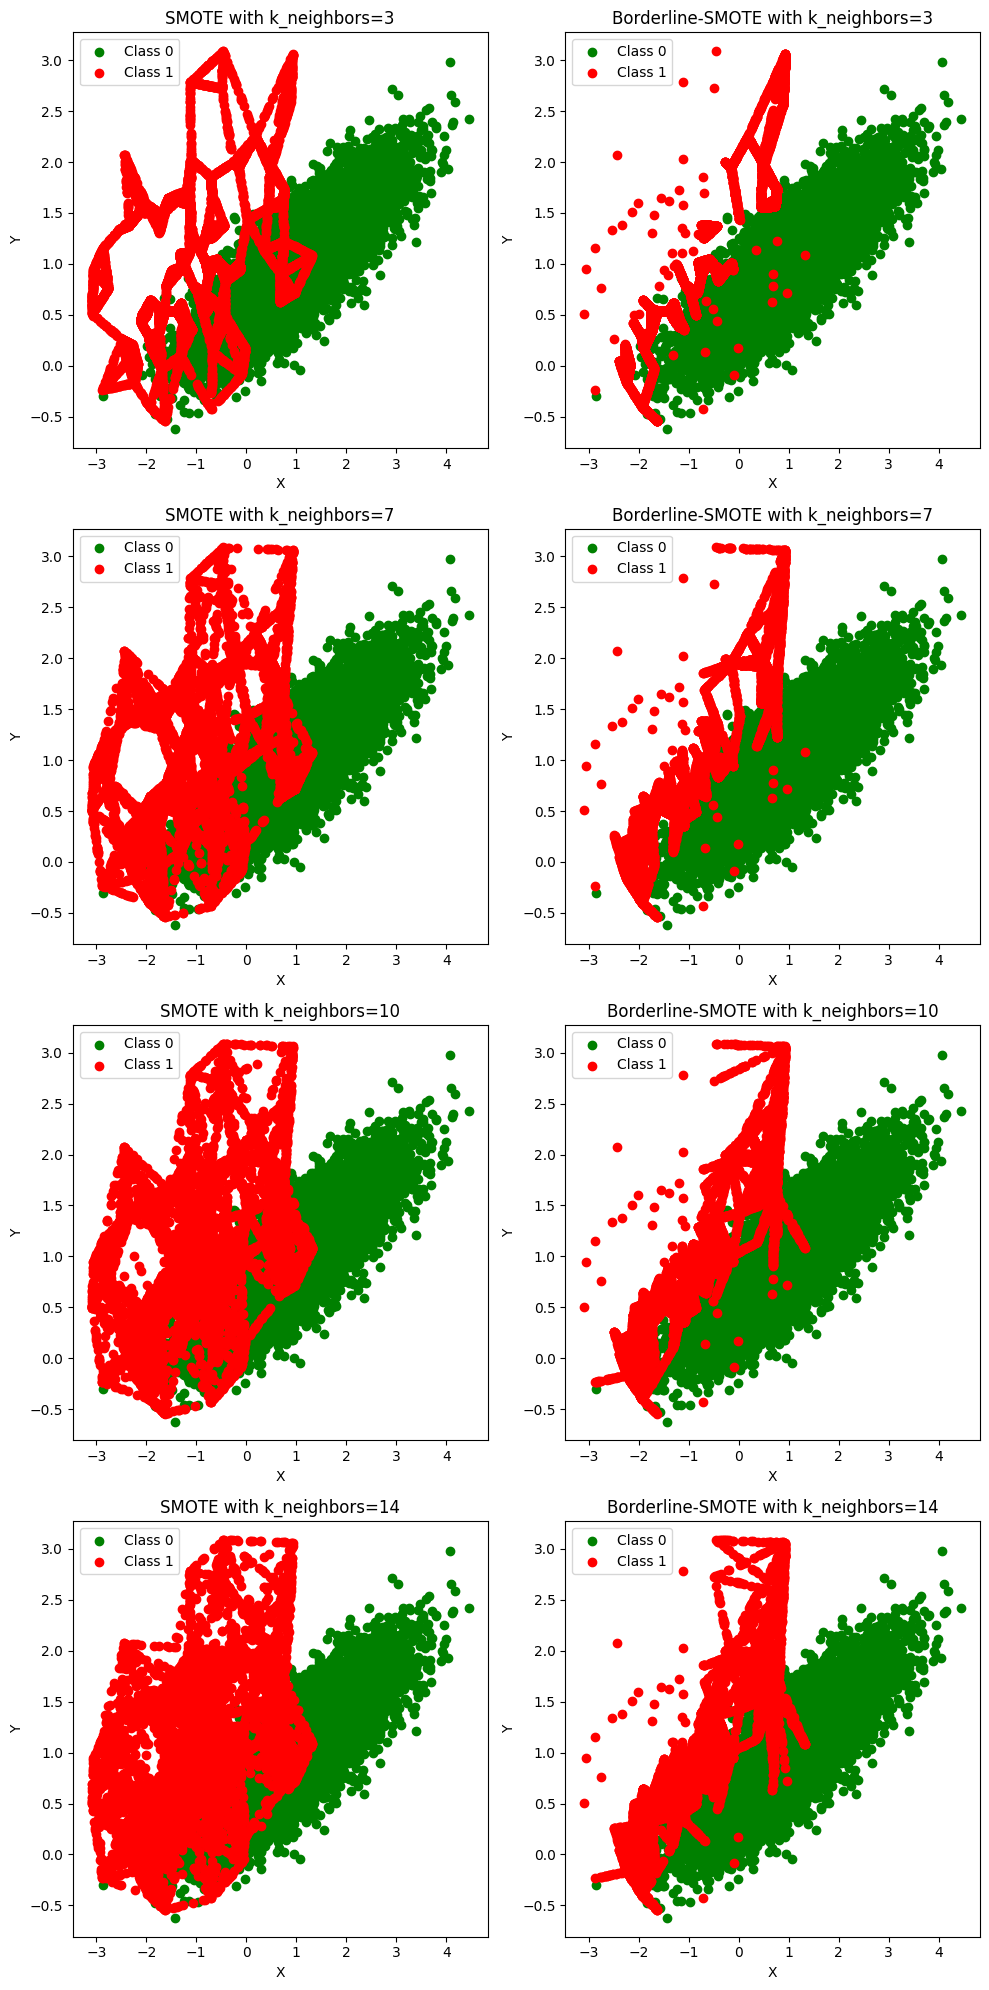

In [18]:
k_values = [3, 7, 10, 14]

plt.figure(figsize=(10, 20))

for i, k in enumerate(k_values, 1):
    smote = SMOTE(k_neighbors=k, random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y)

    # SMOTE
    plt.subplot(4, 2, 2 * i - 1)
    plt.scatter(X_smote[y_smote == 0].iloc[:, 0], X_smote[y_smote == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
    plt.scatter(X_smote[y_smote == 1].iloc[:, 0], X_smote[y_smote == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
    plt.title(f'SMOTE with k_neighbors={k}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Borderline-SMOTE
    bl_smote = BorderlineSMOTE(k_neighbors=k, random_state=random_state)
    X_bl_smote, y_bl_smote = bl_smote.fit_resample(X, y)

    plt.subplot(4, 2, 2 * i)
    plt.scatter(X_bl_smote[y_bl_smote == 0].iloc[:, 0], X_bl_smote[y_bl_smote == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
    plt.scatter(X_bl_smote[y_bl_smote == 1].iloc[:, 0], X_bl_smote[y_bl_smote == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
    plt.title(f'Borderline-SMOTE with k_neighbors={k}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()
plt.show()


The provided visualizations illustrate how the SMOTE and Borderline-SMOTE oversampling techniques affect a dataset when different numbers of nearest neighbors are used.

For SMOTE, using a lower number of nearest neighbors (3, 7) reveals a tendency to form artificial 'lines' between samples. As the k_neighbors parameter increases (10, 14), the synthetic samples from SMOTE begin to spread out more evenly, effectively filling up the space. However, this also means that the samples may become more dispersed, potentially introducing additional noise into the dataset.

On the other hand, Borderline-SMOTE, even with a lower number of nearest neighbors (3, 7), results in fewer 'lines' and produces more randomly distributed synthetic instances compared to SMOTE. Regardless of the k_neighbors value used, Borderline-SMOTE consistently concentrates on the borderline areas between classes. This characteristic helps it avoid forming the 'line' patterns commonly seen with SMOTE, maintaining a focus on the critical overlap regions.

***

The sampling_strategy parameter plays a vital role in SMOTE and Borderline-SMOTE oversampling techniques, particularly in determining the approach to resampling in datasets with imbalanced classes. By default, this parameter is set to balance the class distribution at a 1:1 ratio, targeting the minority class.
In the upcoming experiments, different ratios for the sampling_strategy parameter will be tested for both algorithms to assess their impact on the balance between class distribution and overfitting risks.

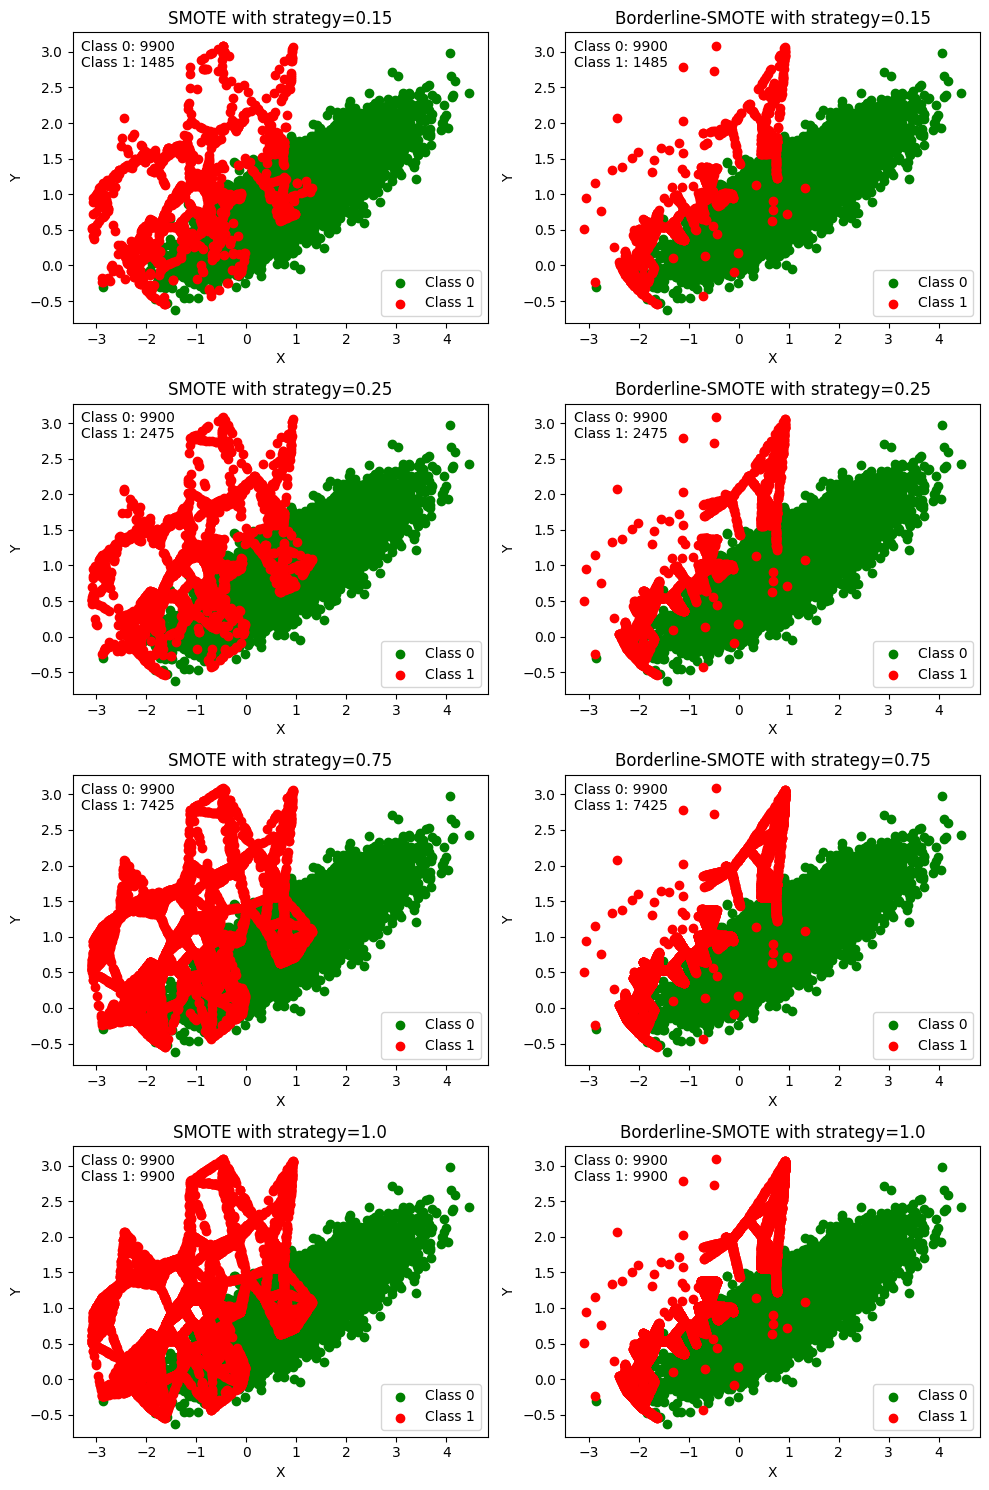

In [19]:
sampling_strategies = [0.15, 0.25, 0.75, 1.0]

plt.figure(figsize=(10, 15))

for i, strategy in enumerate(sampling_strategies, 1):
    smote = SMOTE(sampling_strategy=strategy, random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y)

    # SMOTE
    plt.subplot(4, 2, 2 * i - 1)
    plt.scatter(X_smote[y_smote == 0].iloc[:, 0], X_smote[y_smote == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
    plt.scatter(X_smote[y_smote == 1].iloc[:, 0], X_smote[y_smote == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
    plt.title(f'SMOTE with strategy={strategy}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='lower right')
    plt.text(0.02, 0.88,
             f'Class 0: {sum(y_smote == 0)}\nClass 1: {sum(y_smote == 1)}',
             transform=plt.gca().transAxes)

    # Borderline-SMOTE
    bl_smote = BorderlineSMOTE(sampling_strategy=strategy, random_state=random_state)
    X_bl_smote, y_bl_smote = bl_smote.fit_resample(X, y)

    plt.subplot(4, 2, 2 * i)
    plt.scatter(X_bl_smote[y_bl_smote == 0].iloc[:, 0], X_bl_smote[y_bl_smote == 0].iloc[:, 1], color='green', label='Class 0')  # Green for Class 0
    plt.scatter(X_bl_smote[y_bl_smote == 1].iloc[:, 0], X_bl_smote[y_bl_smote == 1].iloc[:, 1], color='red', label='Class 1')  # Red for Class 1
    plt.title(f'Borderline-SMOTE with strategy={strategy}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='lower right')
    plt.text(0.02, 0.88,
             f'Class 0: {sum(y_bl_smote == 0)}\nClass 1: {sum(y_bl_smote == 1)}',
             transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


The visualizations demonstrate the outcomes of employing SMOTE and Borderline-SMOTE oversampling methods with varying ratios.

As the sampling strategy ratio is elevated, there's a noticeable increase in the density of synthetic instances for both algorithms. In the case of SMOTE, a higher number of instances continues to result in the formation of 'line' patterns throughout the feature space. Conversely, Borderline-SMOTE predominantly focuses on generating synthetic samples near the class boundaries. Increasing the number of synthetic samples leads to more densely packed decision boundaries. However, as the ratios grow even higher, while the focus on borderline areas is sustained, there's a heightened risk of introducing noise into the model.

This gradation from lower to higher sampling strategy values indeed contributes to a more balanced class distribution. Nonetheless, it simultaneously underscores the importance of meticulous model evaluation to circumvent the potential issue of overfitting.